# Regression Linéaire

## Paramètres

In [331]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as gp



sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

%matplotlib inline

## Data

In [7]:
medical_df = pd.read_csv('medical.csv')

In [8]:
medical_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
medical_df.shape

(1338, 7)

In [15]:
medical_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### AGE

In [31]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [38]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal= 'box',
                   nbins=47,
                   title = "Distribution de l'Age")
fig.update_layout(bargap = 0.1)
fig.show()

In [89]:
df_pyramide = medical_df[['age', 'sex']]
df_pyramide.head()

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male


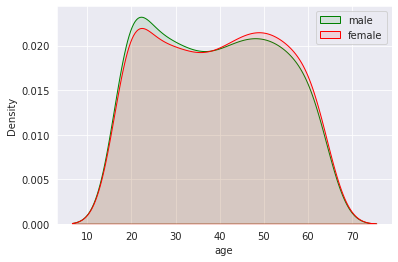

In [113]:
M = df_pyramide[df_pyramide["sex"]=="male"]
F = df_pyramide[df_pyramide["sex"]=="female"]

X1 = M["age"].dropna()
X2 = F["age"].dropna()
L1=sns.kdeplot(X1, shade=True, label="male", color="green", alpha=0.1)
L2=sns.kdeplot(X2, shade=True, label="female",color='red', alpha=0.1)
L2.legend()
plt.show()

In [114]:
df_pyramide['age_cat'] = pd.cut(
    x = df_pyramide['age'], 
    bins= [x for x in range(14, 65, 5)], 
    right='True')
df_pyramide

<ipython-input-114-6c497e3eaf10>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,age_cat
0,19,female,"(14, 19]"
1,18,male,"(14, 19]"
2,28,male,"(24, 29]"
3,33,male,"(29, 34]"
4,32,male,"(29, 34]"
...,...,...,...
1333,50,male,"(49, 54]"
1334,18,female,"(14, 19]"
1335,18,female,"(14, 19]"
1336,21,female,"(19, 24]"


In [102]:
catage = df_pyramide[['sex',	'age_cat']]
catage

,sex,age_cat
0,female,"(14, 19]"
1,male,"(14, 19]"
2,male,"(24, 29]"
3,male,"(29, 34]"
4,male,"(29, 34]"
...,...,...
1333,male,"(49, 54]"
1334,female,"(14, 19]"
1335,female,"(14, 19]"
1336,female,"(19, 24]"


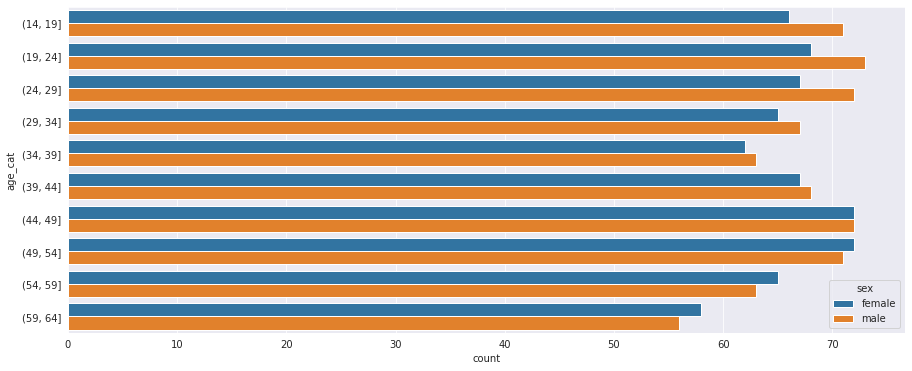

In [133]:
plt.figure(figsize = (15, 6))
sns.countplot(data=catage, y="age_cat", hue="sex");

In [260]:
catage

,sex,age_cat
0,female,"(14, 19]"
1,male,"(14, 19]"
2,male,"(24, 29]"
3,male,"(29, 34]"
4,male,"(29, 34]"
...,...,...
1333,male,"(49, 54]"
1334,female,"(14, 19]"
1335,female,"(14, 19]"
1336,female,"(19, 24]"


In [268]:
df_age = catage.groupby(['age_cat', 'sex'])['sex'].count()
df_age

age_cat   sex   
(14, 19]  female    66
          male      71
(19, 24]  female    68
          male      73
(24, 29]  female    67
          male      72
(29, 34]  female    65
          male      67
(34, 39]  female    62
          male      63
(39, 44]  female    67
          male      68
(44, 49]  female    72
          male      72
(49, 54]  female    72
          male      71
(54, 59]  female    65
          male      63
(59, 64]  female    58
          male      56
Name: sex, dtype: int64

In [275]:
df_age = df_age.unstack(1).reset_index()

In [287]:
data

sex,age_cat,female,male
0,"(14, 19]",66,71
1,"(19, 24]",68,73
2,"(24, 29]",67,72
3,"(29, 34]",65,67
4,"(34, 39]",62,63
5,"(39, 44]",67,68
6,"(44, 49]",72,72
7,"(49, 54]",72,71
8,"(54, 59]",65,63
9,"(59, 64]",58,56


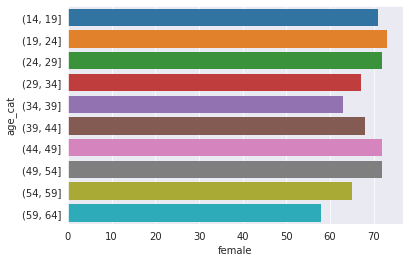

In [290]:
bar_plot = sns.barplot(x='male', y='age_cat', data=data, order=data.age_cat, lw=0)
bar_plot = sns.barplot(x='female', y='age_cat', data=data, order= data.age_cat, lw=0)

[Text(0, 0.5, 'Age-Group'),
 Text(0.5, 0, 'Population (hundreds of millions)'),
 Text(0.5, 1.0, 'Population Pyramid')]

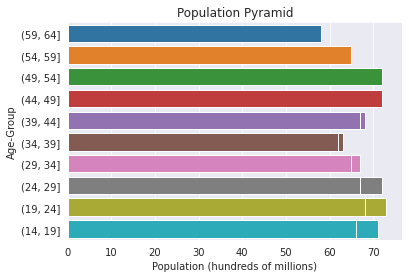

In [299]:
AgeClass = ['(59, 64]', '(54, 59]', '(49, 54]', '(44, 49]', '(39, 44]', '(34, 39]', '(29, 34]', '(24, 29]', '(19, 24]', '(14, 19]']

bar_plot = sns.barplot(x='male', y='age_cat', data=data, order=AgeClass)

bar_plot = sns.barplot(x='female', y='age_cat', data=data, order=AgeClass)

bar_plot.set(xlabel="Population (hundreds of millions)", ylabel="Age-Group", title = "Population Pyramid")

In [295]:
df = data
df

sex,age_cat,female,male
0,"(14, 19]",66,71
1,"(19, 24]",68,73
2,"(24, 29]",67,72
3,"(29, 34]",65,67
4,"(34, 39]",62,63
5,"(39, 44]",67,68
6,"(44, 49]",72,72
7,"(49, 54]",72,71
8,"(54, 59]",65,63
9,"(59, 64]",58,56


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age_cat  10 non-null     object
 1   female   10 non-null     int64 
 2   male     10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [297]:
df['age_cat'] = df.age_cat.astype(str)

In [300]:
y_age = df['age_cat']
x_M = data['male']
x_F = data['female'] * -1

In [313]:
# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M,
					name = 'Male',
					orientation = 'h'))

# Adding Female data to the figure
fig.add_trace(gp.Bar(y = y_age, x = x_F,
					name = 'Female', 
          orientation = 'h'))

# Updating the layout for our graph
fig.update_layout(title = 'Pyramide des ages',
				title_font_size = 22, barmode = 'relative',
				bargap = 0.01, bargroupgap = 0,
        xaxis = dict(tickvals = [-60, -40, -20,
                                          0, 20, 40, 60],
                                
                              ticktext = ['60', '40', '20', '0', 
                                          '20', '40', '60'],
                                
                              title = 'Effectif',
                              title_font_size = 14)
				)

fig.show()


In [314]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [318]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence = ['green'],
                   title = 'Distributionof BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

In [320]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'red'],
                   title = 'Annual')
fig.update_layout(bargap = 0.1)
fig.show()

In [327]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [333]:
px.histogram(medical_df, x = 'smoker', color ='sex', title = 'smoker by sex')

In [334]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence = ['green', 'red'],
                   title = 'Annual')
fig.update_layout(bargap = 0.1)
fig.show()

In [338]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'region',
                   color_discrete_sequence = ['green', 'red', 'yellow', 'black'],
                   title = 'Annual')
fig.update_layout(bargap = 0.1)
fig.show()

In [350]:
fig = px.scatter(medical_df, 
                 x="age", 
                 y="charges", 
                 color="smoker",
                 hover_data=['sex'],
                 title = 'Age vs Charges',
                 opacity=1)
fig.update_traces(marker_size = 5)
fig.show()

In [351]:
fig = px.scatter(medical_df, 
                 x="bmi", 
                 y="charges", 
                 color="smoker",
                 hover_data=['sex'],
                 title = 'BMI vs Charges',
                 opacity=1)
fig.update_traces(marker_size = 5)
fig.show()

In [352]:
fig = px.violin(medical_df, 
                y="age", 
                color="sex",
                violinmode='overlay', # draw violins on top of each other
                # default violinmode is 'group' as in example above
                hover_data=medical_df.columns)
fig.show()

In [354]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [355]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [356]:
medical_df.age.corr(medical_df.bmi)

0.1092718815485352

In [359]:
smoker_values = {'no' : 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [364]:
#method : {'pearson', 'kendall', 'spearman'}
medical_df.corr(method='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [365]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

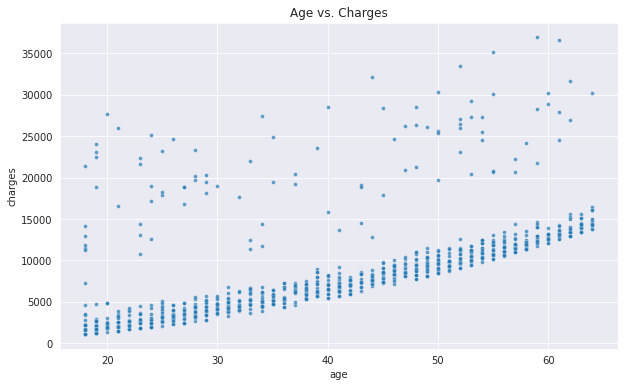

In [368]:
plt.figure(figsize = (10,6))
plt.title("Age vs. Charges")
sns.scatterplot(data = non_smoker_df, x = 'age', y='charges', alpha=0.7, s=15)
plt.show()

In [369]:
def estimate_charges(age, w, b):
  return w * age + b

In [370]:
w = 50
b = 100

In [371]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [372]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [380]:
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

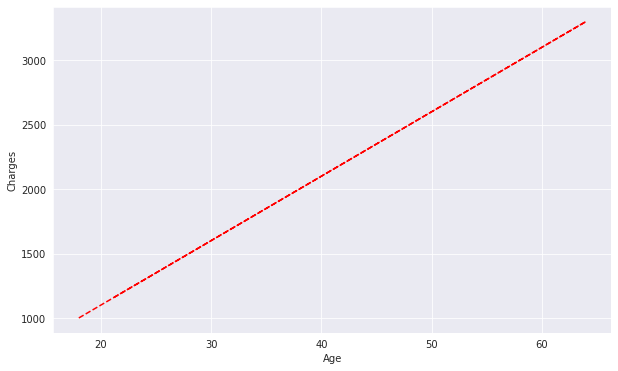

In [386]:
plt.figure(figsize = (10,6))
plt.plot(ages, estimated_charges, 'r--')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

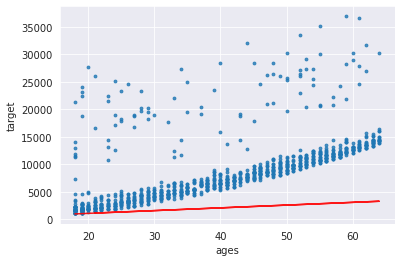

In [388]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9);

plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('ages')
plt.ylabel('target')
plt.show()

In [389]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b )

  plt.plot(ages, estimated_charges, 'r', alpha = 0.9);

  plt.scatter(ages, target, s =8, alpha = 0.8)
  plt.xlabel('ages')
  plt.ylabel('charges')
  plt.legend(['Estimate', 'Actual']);



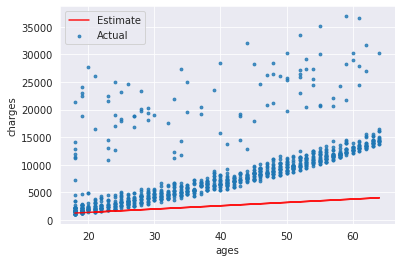

In [390]:
try_parameters(60, 200)

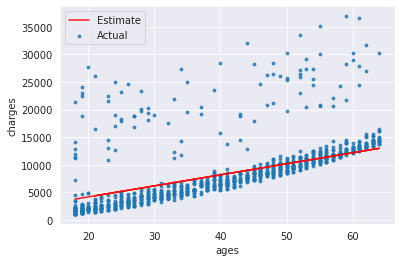

In [391]:
try_parameters(200, 200)

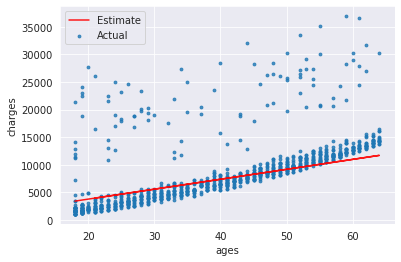

In [393]:
try_parameters(180, 200)

In [394]:
predictions  = estimated_charges

In [395]:
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [396]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [397]:
w = 50
b = 100

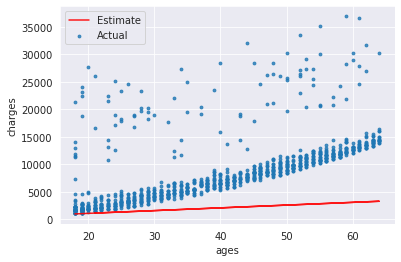

In [398]:
try_parameters(w=w, b=b)

In [399]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [400]:
rmse(targets, predicted)

8461.949562575493

In [401]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b )

  plt.plot(ages, estimated_charges, 'r', alpha = 0.9);

  plt.scatter(ages, target, s =8, alpha = 0.8)
  plt.xlabel('ages')
  plt.ylabel('charges')
  plt.legend(['Estimate', 'Actual']);

  loss = rmse(target, predictions)
  print('RMSE Loss : ', loss)

RMSE Loss :  8461.949562575493


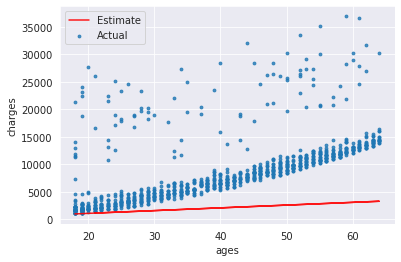

In [402]:
try_parameters(50, 100)

RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493
RMSE Loss :  8461.949562575493


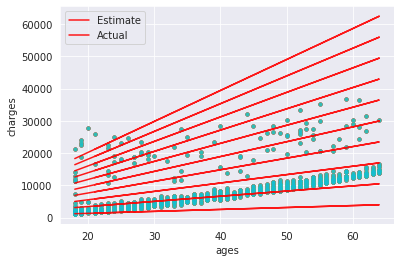

In [407]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

print(inputs.shape, targets.shape)


(1064, 1) (1064,)


In [408]:
model.fit(inputs, targets)

LinearRegression()

In [409]:
model.predict(np.array([[23],
                        [37],
                        [61]]))


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [410]:
predictions = model.predict(inputs)

In [411]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [412]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [413]:
rmse(targets, predictions)

4662.505766636395

In [414]:
model.coef_

array([267.24891283])

In [415]:
model.intercept_

-2091.4205565650864

RMSE Loss :  4662.505766636395


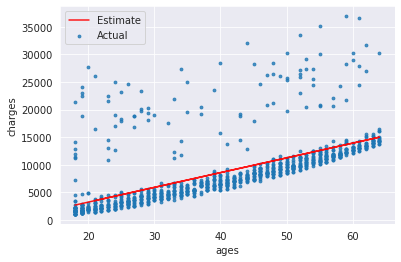

In [416]:
try_parameters(model.coef_, model.intercept_)

RMSE Loss :  4662.505766636395


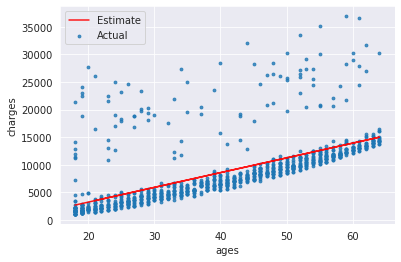

In [420]:
from sklearn.linear_model import SGDRegressor
models = SGDRegressor()
models.fit(inputs, targets)
try_parameters(model.coef_, model.intercept_)

In [438]:
df = pd.read_csv('medical.csv')

In [439]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [440]:
df['sex'] = df['sex'].map({'female':0, 'male':1})

In [441]:
df['smoker'] = df['smoker'].map({'yes':0, 'no':1})

In [445]:
df['region'] = df['region'].map({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3})

In [448]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [453]:
X = df.drop('charges', axis = 1) 
y = df['charges']

In [451]:
from sklearn.model_selection import train_test_split

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

In [459]:
print(X_train.shape)
print(X_test.shape)


(1070, 6)
(268, 6)


In [460]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [462]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, y_test)))

5682.77995539676


In [469]:
new = np.array([[19, 0, 27.900, 0, 0, 1]])

In [470]:
model.predict(new)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([25367.58156147])